In [1]:
import os
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Sample grammar texts and scores
texts = [
    "I have a book. It is on the table.",
    "He going to market yesterday.",
    "The quick brown fox jumps over the lazy dog.",
    "They was playing in the ground.",
    "She has gone to school.",
    "The boy are eating apple.",
    "We will go tomorrow.",
    "This is best day of my life.",
    "It raining heavily now.",
    "My friend and I were playing cricket."
]

# These scores are just example grammar quality ratings from 0 to 10
scores = [9.0, 3.5, 10.0, 4.0, 8.5, 4.5, 9.5, 5.5, 6.0, 9.0]

# Step 2: Vectorize the input text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Step 3: Train the model
model = LinearRegression()
model.fit(X, scores)

# Step 4: Save the model and vectorizer
os.makedirs('models', exist_ok=True)
joblib.dump(model, 'models/grammar_model.pkl')
joblib.dump(vectorizer, 'models/vectorizer.pkl')

print("✅ Model and vectorizer saved successfully in 'models/' folder.")


✅ Model and vectorizer saved successfully in 'models/' folder.


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


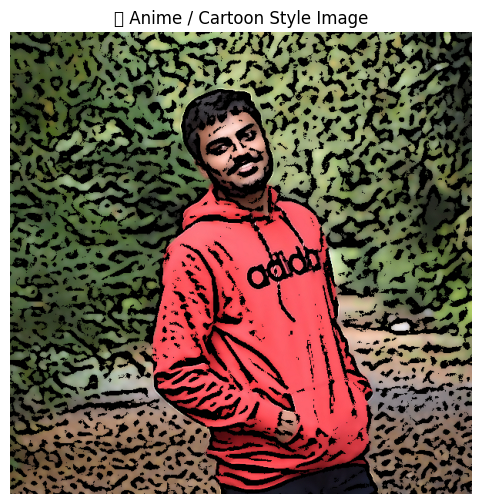

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def anime_style_generator(image_path):
    # Load and resize the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (600, 600))
    
    # Color smoothing using bilateral filtering (strong effect)
    smooth = cv2.bilateralFilter(img, d=9, sigmaColor=100, sigmaSpace=100)
    
    # Convert to grayscale and apply median blur
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 7)
    
    # Create bold edges
    edges = cv2.adaptiveThreshold(
        blur, 255,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        blockSize=9, C=2
    )
    
    # Sharpen the smoothed image for animation-like contrast
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(smooth, -1, kernel)

    # Bitwise AND to apply edges to sharpened color image
    cartoon = cv2.bitwise_and(sharpened, sharpened, mask=edges)

    # Convert to RGB for displaying with matplotlib
    cartoon_rgb = cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB)

    # Display result
    plt.figure(figsize=(6, 6))
    plt.imshow(cartoon_rgb)
    plt.axis('off')
    plt.title("🌀 Anime / Cartoon Style Image")
    plt.show()

# Example usage
anime_style_generator("C:\\Users\\USER\\Desktop\\SHL assignment\\mazid.jpg")
